1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6),
(9, 2)].
Implement principal component analysis. Use this to obtain the feature in transformed
2D feature space. Plot the scatter plot of data points in both the original as well as
transformed domain.

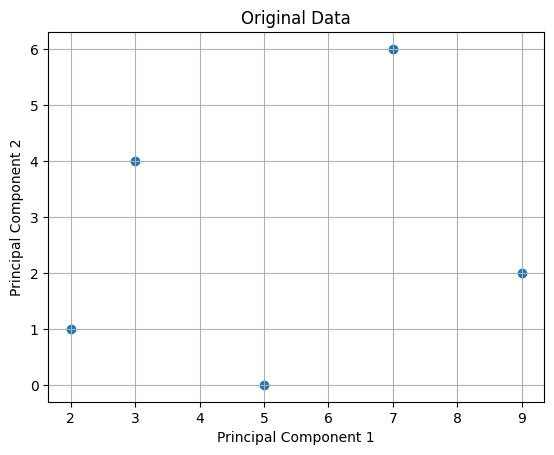

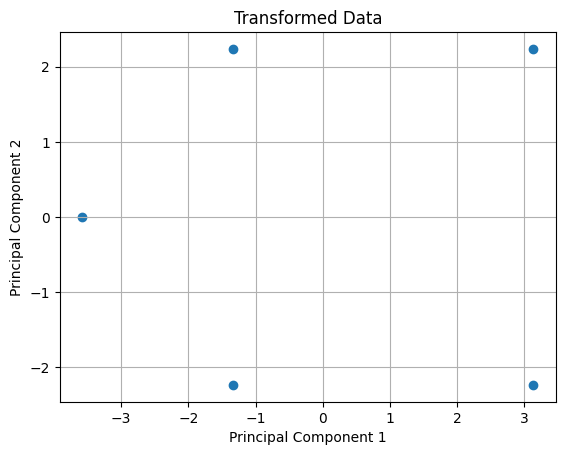

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pca(data_matrix, n_components=2):
    # Center the data
    data_mean = np.mean(data_matrix, axis=0)
    centered_data = data_matrix - data_mean

    # Compute covariance matrix
    covariance_matrix = np.cov(centered_data.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Choose the top 'n_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Project the data onto the new feature space
    transformed_data = np.dot(centered_data, top_eigenvectors)

    return transformed_data, top_eigenvectors

def plot_scatter(data, title):
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# Given two-dimensional data matrix
data_matrix = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

# Perform PCA
transformed_data, eigenvectors = pca(data_matrix)

# Plot scatter plot for original data
plot_scatter(data_matrix, 'Original Data')

# Plot scatter plot for transformed data
plot_scatter(transformed_data, 'Transformed Data')


Implement Principal Component Analysis Algorithm and use it to reduce dimensions
of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed
domain with different colour codes for samples belonging to different classes.

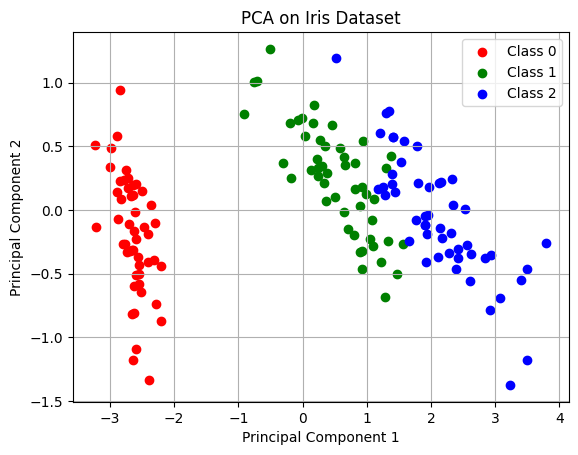

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def pca(X, n_components=2):
    # Center the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # Compute covariance matrix
    cov_matrix = np.cov(X_centered.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Choose the top 'n_components' eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Project the data onto the new feature space
    transformed_data = np.dot(X_centered, top_eigenvectors)

    return transformed_data, top_eigenvectors

def plot_scatter_with_classes(data, labels):
    plt.figure()
    colors = ['r', 'g', 'b']
    for i, label in enumerate(np.unique(labels)):
        plt.scatter(data[labels == label, 0], data[labels == label, 1], color=colors[i], label=f'Class {label}')
    plt.title('PCA on Iris Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
transformed_iris_data, _ = pca(X, n_components=2)

# Plot scatter plot with different color codes for samples belonging to different classes
plot_scatter_with_classes(transformed_iris_data, y)
